<a href="https://colab.research.google.com/github/IkGyu-Lee/PyTorch_Tutorial/blob/master/manipulation_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Manipulation

In [ ]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print(t.dim())
print(t.size())
print(t.shape)

2
torch.Size([4, 3])
torch.Size([4, 3])


In [ ]:
# Broadcasting

# Vector + Vector
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [ ]:
# 2 x 1 Vector + 1 x 2 Vector -> 2 x 2 Vector + 2 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [ ]:
# Matrix Multiplication
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [ ]:
# element-wise multiplication
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [ ]:
# mean
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [ ]:
# mean
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


In [ ]:
# sum
t = torch.FloatTensor([[1, 2],
                       [3, 4]])
print(t.sum())
print(t.sum(dim=0))  # 행을 제거
print(t.sum(dim=1))  # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [ ]:
# max, argmax
t = torch.FloatTensor([[1, 2],
                       [3, 4]])
print(t.max())
print(t.max(dim=0))
print(t.max(dim=1))

print('')
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [ ]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
# numpy의 reshape = torch의 view
print(ft.view([-1, 3])) # -1 첫번째 차원은 pytorch가 선택, 3 두번째 차원은 길이가 3 -> (?, 3)으로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
# squeeze
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [ ]:
# unsqueeze
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
# concatenate
x = torch.FloatTensor([[1, 2],
                       [3, 4]])
y = torch.FloatTensor([[5, 6],
                       [7, 8]])

In [ ]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [ ]:
# stacking
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [ ]:
print(torch.stack([x,y,z])) # default dim=0
print(torch.stack([x,y,z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
# ones_like & zeros_like -> 0,1으로만 채워진 tensor
x = torch.FloatTensor([[0, 1, 2],
                       [2, 1, 0]])
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# 덮어쓰기 연산
x = torch.FloatTensor([[1, 2],
                       [3, 4]])

print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(x.mul_(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# Linear Regression

활성화 함수(activation function)

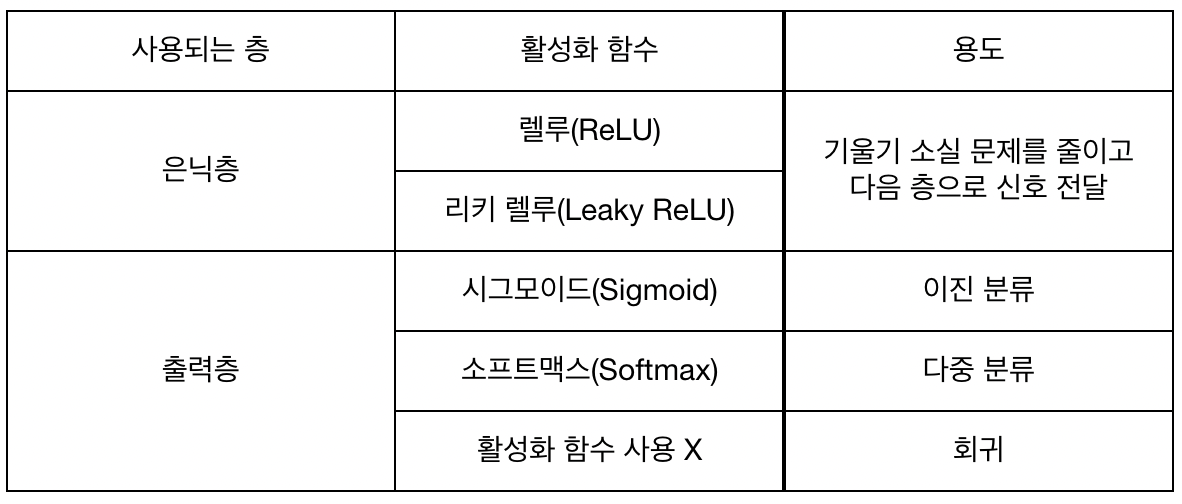

손실 함수(loss function) = 비용 함수(cost function) = 오차 함수(error function) = 목적 함수(objective function)
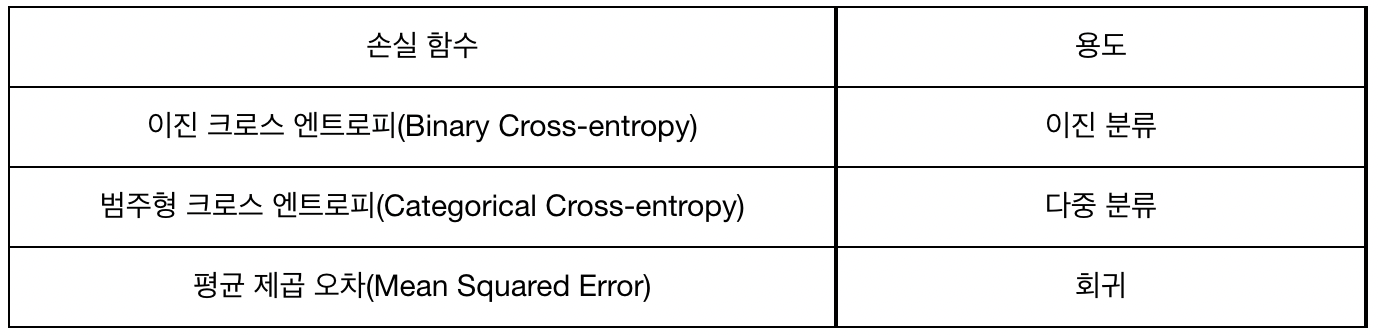

Optimizer : SGD, Momentum, Adam
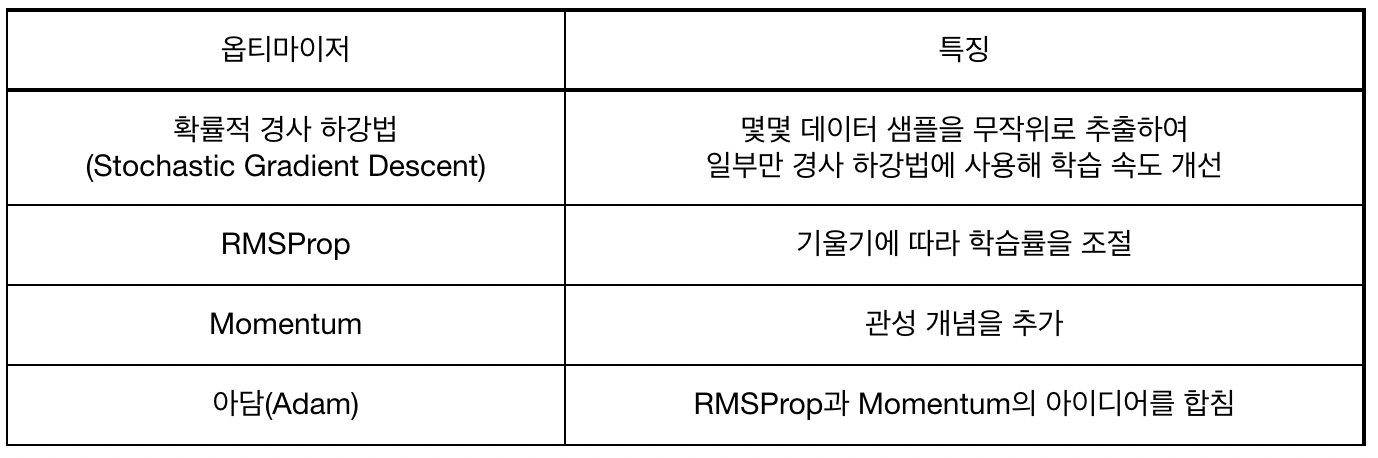

In [ ]:
# seed 값 고정
torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
# 가중치 W를 0으로 초기화
W = torch.zeros(1, requires_grad=True)
W

tensor([0.], requires_grad=True)

In [ ]:
# bias 초기화
b = torch.zeros(1, requires_grad=True)
b

tensor([0.], requires_grad=True)

In [ ]:
hypo = x_train * W + b
hypo

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

In [ ]:
# MSE
cost = torch.mean((hypo - y_train) ** 2)
cost

tensor(18.6667, grad_fn=<MeanBackward0>)

In [ ]:
# Gradient Descent
optimizer = optim.SGD([W, b], lr=0.01)
# gradient를 0으로 초기화
optimizer.zero_grad()
# cost func 미분하여 gradient 계산
cost.backward()
# W, b 업데이트
optimizer.step()

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

In [ ]:
# 로지스틱 회귀
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# nn.Sequential은 layer를 쌓을 수 있게함
model = nn.Sequential(
    nn.Linear(2, 1), # input_dim = 2, output_dim = 1
    nn.Sigmoid() # 출력은 sigmoid func
)

In [ ]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypo = model(x_train)

  # cost 계산
  cost = F.binary_cross_entropy(hypo, y_train)

  # 계산된 cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 10 == 0:
    prediction = hypo >= torch.FloatTensor([0.5]) # prediction이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하면 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도 계산
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.019825 Accuracy 100.00%
Epoch   10/1000 Cost: 0.019642 Accuracy 100.00%
Epoch   20/1000 Cost: 0.019463 Accuracy 100.00%
Epoch   30/1000 Cost: 0.019288 Accuracy 100.00%
Epoch   40/1000 Cost: 0.019115 Accuracy 100.00%
Epoch   50/1000 Cost: 0.018946 Accuracy 100.00%
Epoch   60/1000 Cost: 0.018779 Accuracy 100.00%
Epoch   70/1000 Cost: 0.018615 Accuracy 100.00%
Epoch   80/1000 Cost: 0.018455 Accuracy 100.00%
Epoch   90/1000 Cost: 0.018297 Accuracy 100.00%
Epoch  100/1000 Cost: 0.018141 Accuracy 100.00%
Epoch  110/1000 Cost: 0.017989 Accuracy 100.00%
Epoch  120/1000 Cost: 0.017839 Accuracy 100.00%
Epoch  130/1000 Cost: 0.017691 Accuracy 100.00%
Epoch  140/1000 Cost: 0.017546 Accuracy 100.00%
Epoch  150/1000 Cost: 0.017403 Accuracy 100.00%
Epoch  160/1000 Cost: 0.017263 Accuracy 100.00%
Epoch  170/1000 Cost: 0.017125 Accuracy 100.00%
Epoch  180/1000 Cost: 0.016989 Accuracy 100.00%
Epoch  190/1000 Cost: 0.016855 Accuracy 100.00%
Epoch  200/1000 Cost: 0.016723 Accuracy 

In [ ]:
model(x_train)

tensor([[5.4327e-05],
        [1.6832e-02],
        [2.0145e-02],
        [9.7646e-01],
        [9.9951e-01],
        [9.9994e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
# 훈련 후 W, b
print(list(model.parameters()))

[Parameter containing:
tensor([[3.8963, 1.8566]], requires_grad=True), Parameter containing:
tensor([-17.4300], requires_grad=True)]
